In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
(X_train,Y_train),(X_test,Y_test)=datasets.mnist.load_data() #loads the data, returns 4 arrays as training and testing datasets
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


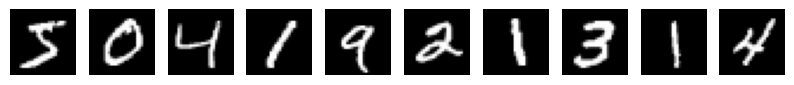

In [ ]:
plt.figure(figsize= (10,2))
for i in range(10): #just checking the first 10 images of the training dataset
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')

In [ ]:
#normalizing data.. Each pixel value ranges from 0 to 255, dividing by 255 the value is normalized to the range [0,1]. This helps in faster training
X_train=X_train/255
X_test=X_test/255


In [ ]:
#sequential is a keras model to stack layers sequentially.. basically output of the previous layer is passed as input to the next layer in sequence.
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)), #input layer with 32 filters,kernel size 3x3 and ReLu as activation function
    layers.MaxPooling2D((2,2)), # we perform max pooling operation on the feature map, We extract the cells with the highest activation in a 2x2 grid,reduces dimensions.
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),#we double the number of filters so as to extract more complicated patterns formed by combinations of features from the previous layer
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),#flattens the output to 1D layer
    layers.Dense(128,activation='relu'), #this layer has 128 neurons each fully connected to all the neurons in the flattened input layer. ReLu is applied
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')#this layer has 10 neurons on for each class in MNIST dataset. Softmax activation function is used to classify output to probabilities
])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#configures the model for training
#we use adam optimizer,loss is sparse categorical crossentropy. It is suitable for classification tasks with integers... also metrics=['accuracy'] tracks the accuracy during training and evaluation

In [ ]:
cnn.fit(X_train,Y_train,epochs=5) #trains the model on the training data for 5 epochs

Epoch 1/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2078 - accuracy: 0.9350
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0678 - accuracy: 0.9789
Epoch 3/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0508 - accuracy: 0.9845
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0393 - accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0322 - accuracy: 0.9900


In [ ]:
loss,accuracy=cnn.evaluate(X_test,Y_test)
#this evaluates the model on the test data...
print("Test accuracy is :",accuracy*100,"%")

313/313 [==============================] - 3s 9ms/step - loss: 0.0526 - accuracy: 0.9846
Test accuracy is : 98.46000075340271 %


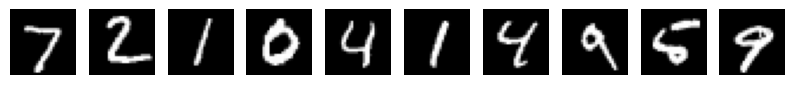

In [ ]:
#We take the first 10 numbers from the testing dataset
plt.figure(figsize= (10,2))
Test=X_test[:10]
for i in range(10):

  plt.subplot(1,10,i+1)
  plt.imshow(Test[i],cmap='gray')
  plt.axis('off')

In [ ]:
#We make predictions using our model on the test sample
Test.shape
predictions=cnn(Test)
y_pred=np.argmax(predictions,axis=1) #argmax() function returns the index of the maximum number in an array according to the spicified axis...
print(y_pred)

[7 2 1 0 4 1 4 9 5 9]
